# Explore

In [160]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import nltk
import unicodedata
import re
from env import user, password, host
import numpy as np
import acquire as a
from wordcloud import WordCloud
import nltk.sentiment
import requests
from bs4 import BeautifulSoup

In [13]:
# setting basic style parameters for matplotlib
plt.rc('figure', figsize=(13, 7))
plt.style.use('seaborn-darkgrid')

Exercises
Do your work for this exercise in a file named explore.


1. USE Spam Data

     a. Load the spam data set.
     
     b. Create and explore bigrams for the spam data. Visualize them with a word cloud. How do they compare with the ham bigrams?
     
     c. Is there any overlap in the bigrams for the spam data and the ham data?
     
     d. Create and explore with trigrams (i.e. a n-gram with an n of 3) for both the spam and ham data.

### load data

In [166]:
# load the spam data set
def get_db_url(database, host=host, user=user, password=password):
    return f'mysql+pymysql://{user}:{password}@{host}/{database}'


url = get_db_url("spam_db")
sql = "SELECT * FROM spam"

df = pd.read_sql(sql, url, index_col="id")
df.head()

,label,text
id,,
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [167]:
df.label.value_counts()

ham     4825
spam     747
Name: label, dtype: int64

In [172]:
747/5572

0.13406317300789664

In [173]:
1-(747/5572)

0.8659368269921034

In [178]:
ADDITIONAL_STOPWORDS = ['r', 'u', '2', 'ltgt']
def clean(text):
    'A simple function to cleanup text data'
    wnl = nltk.stem.WordNetLemmatizer()
    stopwords = nltk.corpus.stopwords.words('english') + ADDITIONAL_STOPWORDS
    text = (unicodedata.normalize('NFKD', text)
             .encode('ascii', 'ignore')
             .decode('utf-8', 'ignore')
             .lower())
    words = re.sub(r'[^\w\s]', '', text).split()
    return [wnl.lemmatize(word) for word in words if word not in stopwords]

### wordcloud

In [6]:
# create subgroups
ham_words = clean(' '.join(df[df.label == 'ham']['text']))
spam_words = clean(' '.join(df[df.label == 'spam']['text']))
all_words = clean(' '.join(df['text']))

In [44]:
ham_words

['go',
 'jurong',
 'point',
 'crazy',
 'available',
 'bugis',
 'n',
 'great',
 'world',
 'la',
 'e',
 'buffet',
 'cine',
 'got',
 'amore',
 'wat',
 'ok',
 'lar',
 'joking',
 'wif',
 'oni',
 'dun',
 'say',
 'early',
 'hor',
 'c',
 'already',
 'say',
 'nah',
 'dont',
 'think',
 'go',
 'usf',
 'life',
 'around',
 'though',
 'even',
 'brother',
 'like',
 'speak',
 'treat',
 'like',
 'aid',
 'patent',
 'per',
 'request',
 'melle',
 'melle',
 'oru',
 'minnaminunginte',
 'nurungu',
 'vettam',
 'set',
 'callertune',
 'caller',
 'press',
 '9',
 'copy',
 'friend',
 'callertune',
 'im',
 'gonna',
 'home',
 'soon',
 'dont',
 'want',
 'talk',
 'stuff',
 'anymore',
 'tonight',
 'k',
 'ive',
 'cried',
 'enough',
 'today',
 'ive',
 'searching',
 'right',
 'word',
 'thank',
 'breather',
 'promise',
 'wont',
 'take',
 'help',
 'granted',
 'fulfil',
 'promise',
 'wonderful',
 'blessing',
 'time',
 'date',
 'sunday',
 'oh',
 'kim',
 'watching',
 'eh',
 'remember',
 'spell',
 'name',
 'yes',
 'v',
 'naught

In [57]:
spam_bigrams = pd.Series(nltk.bigrams(spam_words))

ham_bigrams = pd.Series(nltk.bigrams(ham_words))
all_bigrams = pd.Series(nltk.bigrams(all_words))

In [79]:
top_20_spam_bigrams = (pd.Series(nltk.ngrams(spam_words, 2))
                      .value_counts()
                      .head(20))

top_20_spam_bigrams.head()

(please, call)         44
(customer, service)    27
(po, box)              24
(a1000, cash)          23
(guaranteed, call)     23
dtype: int64

In [80]:
top_20_ham_bigrams = (pd.Series(nltk.ngrams(ham_words, 2))
                      .value_counts()
                      .head(20))

top_20_ham_bigrams.head()

(call, later)    52
(ill, call)      48
(let, know)      42
(sorry, ill)     39
(dont, know)     32
dtype: int64

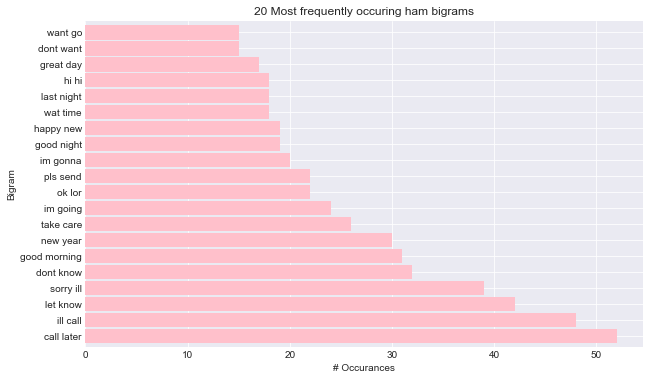

In [64]:
top_20_ham_bigrams.sort_values(ascending=False).plot.barh(color='pink', width=.9, figsize=(10, 6))

plt.title('20 Most frequently occuring ham bigrams')
plt.ylabel('Bigram')
plt.xlabel('# Occurances')

# make the labels pretty
ticks, _ = plt.yticks()
labels = top_20_ham_bigrams.reset_index()['index'].apply(lambda t: t[0] + ' ' + t[1])
_ = plt.yticks(ticks, labels)

In [65]:
spam_bigrams

0                   (free, entry)
1                   (entry, wkly)
2                    (wkly, comp)
3                     (comp, win)
4                       (win, fa)
                   ...           
12157        (087187272008, now1)
12158                 (now1, 10p)
12159                  (10p, per)
12160               (per, minute)
12161    (minute, btnationalrate)
Length: 12162, dtype: object

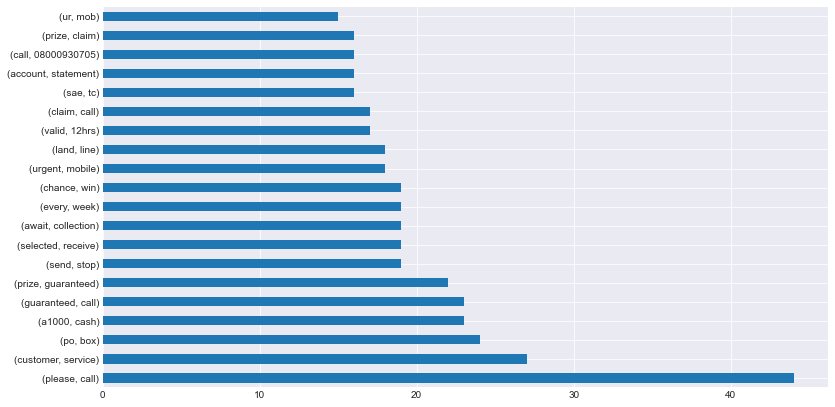

In [66]:
# create and explore bigrams for spam
pd.Series(nltk.bigrams(spam_words)
         ).value_counts().head(20).plot.barh();

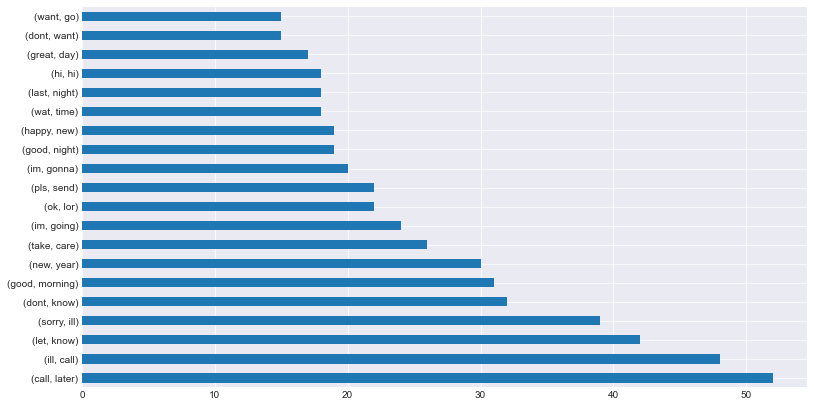

In [67]:
# create and explore bigrams for ham
pd.Series(nltk.bigrams(ham_words)
         ).value_counts().head(20).plot.barh();

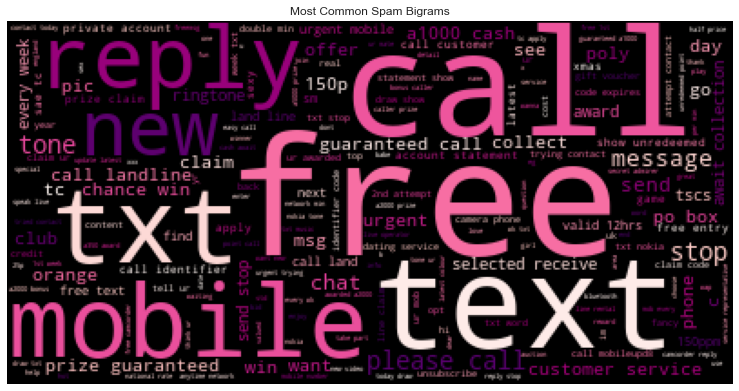

In [70]:
# create WordCloud
img = WordCloud(background_color='black', mode ='RGBA', colormap='RdPu_r'
               ).generate(' '.join(spam_words))
plt.imshow(img)
plt.axis('off')
plt.title('Most Common Spam Bigrams')

plt.show()

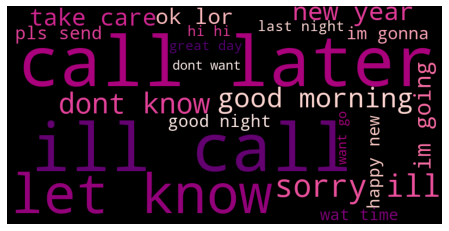

In [81]:
data = {k[0] + ' ' + k[1]: v for k, v in top_20_ham_bigrams.to_dict().items()}
img = WordCloud(background_color='black', width=800, height=400,colormap='RdPu_r').generate_from_frequencies(data)
plt.figure(figsize=(8, 4))
plt.imshow(img)
plt.axis('off')
plt.show()

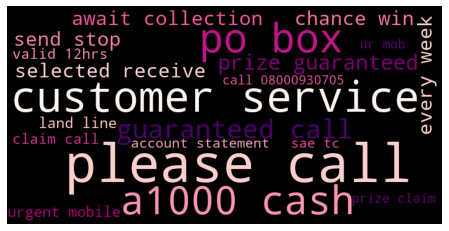

In [83]:
data = {k[0] + ' ' + k[1]: v for k, v in top_20_spam_bigrams.to_dict().items()}
img = WordCloud(background_color='black', width=800, height=400,colormap='RdPu_r').generate_from_frequencies(data)
plt.figure(figsize=(8, 4))
plt.imshow(img)
plt.axis('off')
plt.show()

### overlap

In [84]:
ham_freq = pd.Series(ham_bigrams).value_counts()
spam_freq = pd.Series(spam_bigrams).value_counts()
all_freq = pd.Series(all_bigrams).value_counts()

In [85]:
word_counts = pd.concat([ham_freq, spam_freq, all_freq], axis=1
         ).fillna(0).astype(int)
word_counts.columns = ['ham','spam','all']
word_counts.head()

,,ham,spam,all
call,later,52,0,52
ill,call,48,0,48
let,know,42,0,42
sorry,ill,39,0,39
dont,know,32,6,38


<AxesSubplot:>

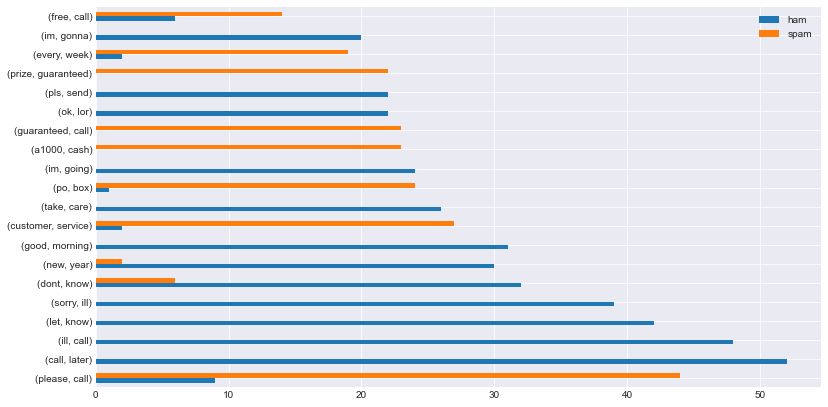

In [86]:
# is there overlap in ham bigrams and spam bigrams
# plt.rc('font', size=18)
word_counts.sort_values(
    'all', ascending=False
)[['ham','spam']].head(20).plot.barh()

There is very little overlap in the top 20 bigrams of ham and spam

### trigrams

In [89]:
top_20_ham_trigrams = (pd.Series(nltk.ngrams(ham_words, 3))
                      .value_counts()
                      .head(20))

top_20_ham_trigrams.head()

(ill, call, later)      42
(sorry, ill, call)      38
(happy, new, year)      19
(pls, send, message)    13
(cant, pick, phone)     12
dtype: int64

In [90]:
top_20_spam_trigrams = (pd.Series(nltk.ngrams(spam_words, 3))
                      .value_counts()
                      .head(20))

top_20_spam_trigrams.head()

(prize, guaranteed, call)     21
(call, customer, service)     15
(land, line, claim)           14
(reply, call, 08000930705)    14
(private, 2003, account)      13
dtype: int64

In [91]:
top_20_all_trigrams = (pd.Series(nltk.ngrams(all_words, 3))
                      .value_counts()
                      .head(20))

top_20_all_trigrams.head()

(ill, call, later)           42
(sorry, ill, call)           38
(prize, guaranteed, call)    21
(happy, new, year)           19
(call, customer, service)    15
dtype: int64

Under trigrams all top 5 match some of the trigrams in ham words and spam words.

# 2. Explore the blog articles using the techniques discussed in the exploration lesson.

In [175]:
url = 'https://codeup.com/blog/'
headers = {'User-Agent': 'Codeup Data Science'}
response = requests.get(url, headers=headers)

soup = BeautifulSoup(response.content, 'html.parser')

links = [link['href'] for link in soup.select('.more-link')]

articles = []

for url in links:
    
    url_response = requests.get(url, headers=headers)
    soup = BeautifulSoup(url_response.text)
    
    title = soup.find('h1', class_='entry-title').text
    content = soup.find('div', class_='entry-content').text.strip()
    
    article_dict = {
        'title': title,
        'content': content
    }
    
    articles.append(article_dict)

In [176]:
# put it in a dataframe
blog_article_df = pd.DataFrame(articles)
blog_article_df

,title,content
0,Become a Data Scientist in 6 Months!,Are you feeling unfulfilled in your work but w...
1,Hiring Tech Talent Around the Holidays,Are you a hiring manager having trouble fillin...
2,Cloud Administration Program New Funding Options,Finding resources to fund your educational goa...
3,Why Dallas is a Great Location for IT Professi...,"When breaking into a new career, it is importa..."
4,Codeup is ranked #1 Best in DFW 2022,We are excited to announce that Codeup ranked ...
5,Codeup’s Scholarship Offerings,In honor of November being National Scholarshi...


In [180]:
def show_counts_and_ratios(df, column):
    """
    Takes in a dataframe and a string of a single column
    Returns a dataframe with absolute value counts and percentage value counts
    """
    labels = pd.concat([df[column].value_counts(),
                    df[column].value_counts(normalize=True)], axis=1)
    labels.columns = ['n', 'percent']
    labels
    return labels


,n,percent
Become a Data Scientist in 6 Months!,1,0.166667
Hiring Tech Talent Around the Holidays,1,0.166667
Cloud Administration Program New Funding Options,1,0.166667
Why Dallas is a Great Location for IT Professionals,1,0.166667
Codeup is ranked #1 Best in DFW 2022,1,0.166667
Codeup’s Scholarship Offerings,1,0.166667


In [198]:
blog_words0 = clean( blog_article_df.content[0])
blog_words1 = clean( blog_article_df.content[1])
blog_words2 = clean( blog_article_df.content[2])
blog_words3 = clean( blog_article_df.content[3])
blog_words4 = clean( blog_article_df.content[4])
blog_words5 = clean( blog_article_df.content[5])

In [213]:
blog_freq0 = pd.Series(blog_words0).value_counts()
blog_freq1 =  pd.Series(blog_words1).value_counts()
blog_freq2 =  pd.Series(blog_words2).value_counts()
blog_freq3 =  pd.Series(blog_words3).value_counts()
blog_freq4 =  pd.Series(blog_words4).value_counts()
blog_freq5 =  pd.Series(blog_words5).value_counts()

In [212]:
blog_i

returning    1
dtype: int64

In [205]:
blog_words5.dtype()

AttributeError: 'list' object has no attribute 'dtype'

In [216]:
blog_freq5

scholarship    19
open            6
anyone          5
woman           5
codeup          3
               ..
november        1
genderqueer     1
nonbinary       1
annie           1
clicking        1
Length: 79, dtype: int64

In [219]:
word_counts = (pd.concat([blog_freq0, blog_freq1, blog_freq2 ,blog_freq3, blog_freq4, blog_freq5], axis=1, sort=True)
                .set_axis(['0', '1', '2','3', '4', '5'], axis=1, inplace=False)
                .fillna(0)
                .apply(lambda s: s.astype(int)))

word_counts.sample(20)

,0,1,2,3,4,5
weve,0,0,0,0,0,1
highlight,0,0,0,0,0,1
certification,0,0,1,0,0,0
free,1,2,1,1,0,0
attempting,0,1,0,0,0,0
web,0,1,0,1,0,0
held,0,0,0,1,0,0
paid,1,1,0,0,0,0
upcoming,0,0,0,0,1,0
take,1,1,0,0,0,0


In [221]:
word_counts.sort_values(by='5', ascending=False).head(10)

,0,1,2,3,4,5
scholarship,0,0,1,0,0,19
open,0,1,0,0,0,6
anyone,0,0,0,0,0,5
woman,0,0,0,0,0,5
codeup,7,10,4,3,2,3
identifies,0,0,0,0,0,3
tech,2,8,2,11,0,2
current,0,1,0,0,0,2
part,0,0,0,0,0,2
covid19,0,0,0,0,0,2


In [222]:
word_counts.sort_values(by='1', ascending=False).head(10)

,0,1,2,3,4,5
codeup,7,10,4,3,2,3
tech,2,8,2,11,0,2
employer,0,6,0,0,0,0
hiring,0,6,0,1,0,0
partner,0,6,0,0,0,0
student,1,4,2,0,0,1
give,3,4,3,3,0,0
program,10,4,9,2,0,1
graduate,0,4,0,0,0,0
accredited,2,4,2,2,0,0


In [223]:
len(word_counts)

524

# 3. Explore the news articles using the techniques discussed in the exploration lesson. Use the category variable when exploring.

In [97]:
inshort_df = a.inshort_info()

In [101]:
inshort_df = pd.DataFrame(inshort_df)

In [104]:
inshort_df.category.value_counts()

national         25
business         25
sports           25
world            25
politics         25
startup          25
hatke            25
automobile       25
technology       24
entertainment    24
science          24
miscellaneous    23
Name: category, dtype: int64

In [132]:
clean(' '.join(inshort_df.content[inshort_df.category == 'politics']))

['tamil',
 'nadu',
 'governor',
 'rn',
 'ravi',
 'tuesday',
 'addressing',
 'civil',
 'service',
 'aspirant',
 'said',
 'difference',
 'central',
 'state',
 'government',
 'doubt',
 'standing',
 'central',
 'government',
 'come',
 'ravi',
 'monday',
 'walked',
 'assembly',
 'following',
 'adoption',
 'resolution',
 'moved',
 'chief',
 'minister',
 'mk',
 'stalin',
 'reporter',
 'asked',
 'parliamentarian',
 'senior',
 'congress',
 'leader',
 'jairam',
 'ramesh',
 'diesel',
 'price',
 'hike',
 'himachal',
 'pradesh',
 'replied',
 'ask',
 'cmwhy',
 'asking',
 'saturday',
 'congressled',
 'state',
 'government',
 'increased',
 'vat',
 'diesel',
 '3litre',
 'meanwhile',
 'bjps',
 'amit',
 'malviya',
 'said',
 'state',
 'government',
 'hiking',
 'fuel',
 'priceshypocrisy',
 'bane',
 'congress',
 'union',
 'minister',
 'state',
 'home',
 'affair',
 'nisith',
 'pramanik',
 'tuesday',
 'surrendered',
 'court',
 'west',
 'bengal',
 'alleged',
 'involvement',
 'burglary',
 'two',
 'jewellery',
 

In [129]:
inshort_df.content

0      An Indian-origin man has been sentenced to 13 ...
1      A woman and her fiance suffered injuries after...
2      A successful training launch of a short-range ...
3      Maharashtra Education Commissioner Suraj Mandh...
4      BJP leader and Haryana Chief Minister Manohar ...
                             ...                        
290    General Motors (GM) reclaimed the top US autom...
291    Ride-hailing startup BluSmart has secured a $1...
292    Tesla on Friday reduced prices for its Model 3...
293    Ola on Wednesday said it'll soon deploy 10,000...
294    Stellantis NV CEO Carlos Tavares said on Thurs...
Name: content, Length: 295, dtype: object

In [134]:
sports_words = clean(' '.join(inshort_df.content[inshort_df.category == 'sports']))
politics_words = clean(' '.join(inshort_df.content[inshort_df.category == 'politcs']))
technology_words = clean(' '.join(inshort_df.content[inshort_df.category == 'technology']))
science_words = clean(' '.join(inshort_df.content[inshort_df.category == 'science']))
entertainment_words = clean(' '.join(inshort_df.content[inshort_df.category == 'entertainment']))
world_words = clean(' '.join(inshort_df.content[inshort_df.category == 'world']))

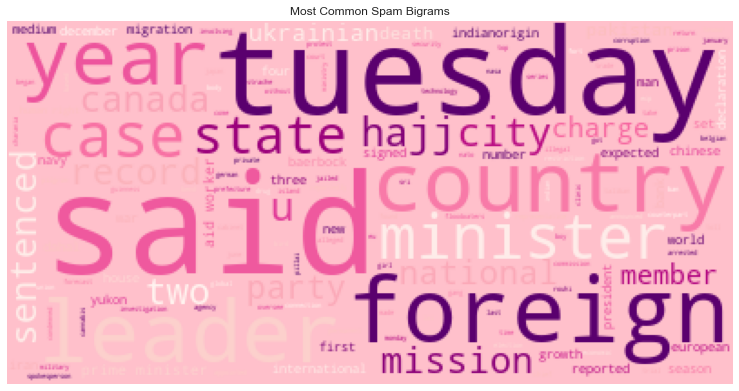

In [152]:
# create WordCloud
img = WordCloud(background_color='pink', mode ='RGBA', colormap='RdPu_r'
               ).generate(' '.join(world_words))
plt.imshow(img)
plt.axis('off')
plt.title('Most Common World Bigrams')

plt.show()

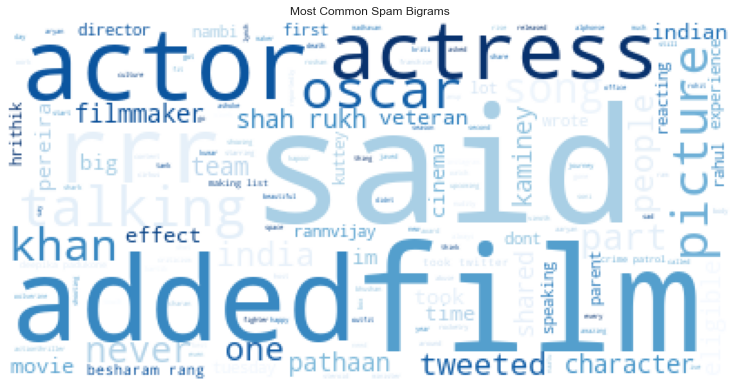

In [150]:
# create WordCloud
img = WordCloud(background_color='white', mode ='RGBA', colormap='Blues'
               ).generate(' '.join(entertainment_words))
plt.imshow(img)
plt.axis('off')
plt.title('Most Common Entertainment Bigrams')

plt.show()

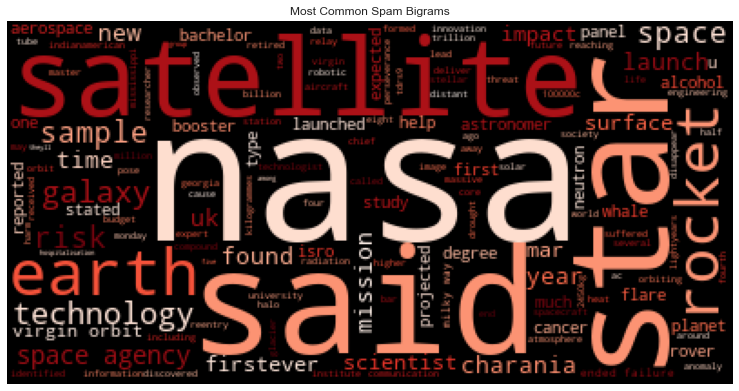

In [147]:
# create WordCloud
img = WordCloud(background_color='black', mode ='RGBA', colormap='Reds'
               ).generate(' '.join(science_words))
plt.imshow(img)
plt.axis('off')
plt.title('Most Common Science Bigrams')

plt.show()

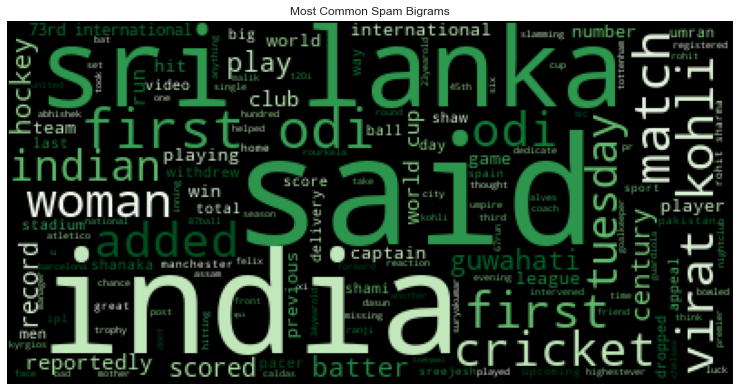

In [148]:
# create WordCloud
img = WordCloud(background_color='black', mode ='RGBA', colormap='Greens'
               ).generate(' '.join(sports_words))
plt.imshow(img)
plt.axis('off')
plt.title('Most Common Sports Bigrams')

plt.show()

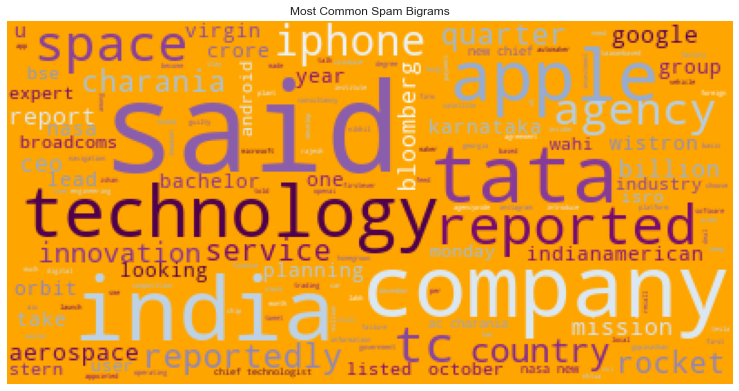

In [151]:
# create WordCloud
img = WordCloud(background_color='orange', mode ='RGBA', colormap='BuPu'
               ).generate(' '.join(technology_words))
plt.imshow(img)
plt.axis('off')
plt.title('Most Common technology Bigrams')

plt.show()